In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading in competition data (takes a wee minute)
# Update filepaths as required
Level1 = pd.read_excel('../Data/Data Visualisation Competition 2025/data/level_1/Level_1.xlsx', 'data')
lookups = pd.read_excel('../Data/Data Visualisation Competition 2025/lookups/lookups.xlsx', 'lookups')
shapes = gpd.read_file('../Data/Data Visualisation Competition 2025/shapefile/small_areas_british_grid.shp')

In [3]:
# Reading in SIMD data
# Update filepath as required
SIMD = pd.read_excel('../Data/SIMD+2020v2+-+ranks.xlsx', 'SIMD 2020v2 ranks')

In [4]:
# Adding lookups to Level1
Level1 = pd.merge(
    left=Level1, 
    right=lookups,
    on='small_area', 
    how='left'
)

In [5]:
# We restrict our attention to Scottish data and combine with the deprivation index, looking at cobenefits per capita.

Scot = Level1.loc[Level1.nation=='Scotland']


cobens = ['air_quality','congestion','dampness','diet_change','excess_cold','excess_heat','hassle_costs','noise',
          'physical_activity', 'road_repairs', 'road_safety', 'sum' ]

# Calculating 'per capita' columns
# This might throw a warning but its fine
for cob in cobens:
    newcol = cob+'_pc'
    Scot[newcol] = Scot[cob] / Scot['population']

# Merge with SIMD data
Scot_SIMD = pd.merge(left=Scot, right=SIMD, left_on='small_area', right_on='Data_Zone', how='left')

# Make geodataframe with shape data
Scot_SIMD_shape = gpd.GeoDataFrame(pd.merge(left=Scot_SIMD, right=shapes, on='small_area', how='left'),geometry='geometry', crs=shapes.crs)

C:\Users\aevet\AppData\Local\Temp\ipykernel_27724\2523342794.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scot[newcol] = Scot[cob] / Scot['population']
C:\Users\aevet\AppData\Local\Temp\ipykernel_27724\2523342794.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scot[newcol] = Scot[cob] / Scot['population']
C:\Users\aevet\AppData\Local\Temp\ipykernel_27724\2523342794.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [6]:
# Cobenefits per capita at local authority level
cobens_pc = [ cob + '_pc' for cob in cobens]
LA = Scot_SIMD_shape.groupby(Scot_SIMD_shape.local_authority)[cobens_pc].sum()

<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='Team'>

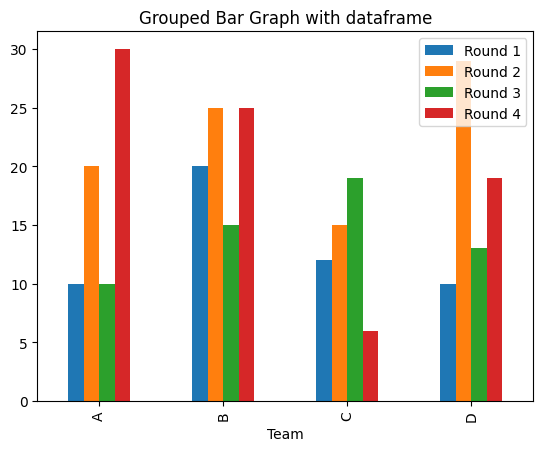

In [9]:

df = pd.DataFrame([['A', 10, 20, 10, 30], ['B', 20, 25, 15, 25], ['C', 12, 15, 19, 6],
                   ['D', 10, 29, 13, 19]],
                  columns=['Team', 'Round 1', 'Round 2', 'Round 3', 'Round 4'])

# plot grouped bar chart
df.plot(x='Team',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph with dataframe')

In [14]:
pd.DataFrame(LA.loc[:,'air_quality_pc':'road_safety_pc'].sum()/32).merge(LA.loc['Fife', 'air_quality_pc':'road_safety_pc'])

0
air_quality_pc        1.553594e-01
congestion_pc        -1.560942e-02
dampness_pc           3.307804e-03
diet_change_pc        1.632166e-02
excess_cold_pc        2.418775e-02
excess_heat_pc        3.809204e-07
hassle_costs_pc      -2.320414e-01
noise_pc              2.254947e-01
physical_activity_pc  3.253753e-01
road_repairs_pc      -1.183298e-03
road_safety_pc       -8.372052e-03

<Axes: title={'center': 'Average'}>

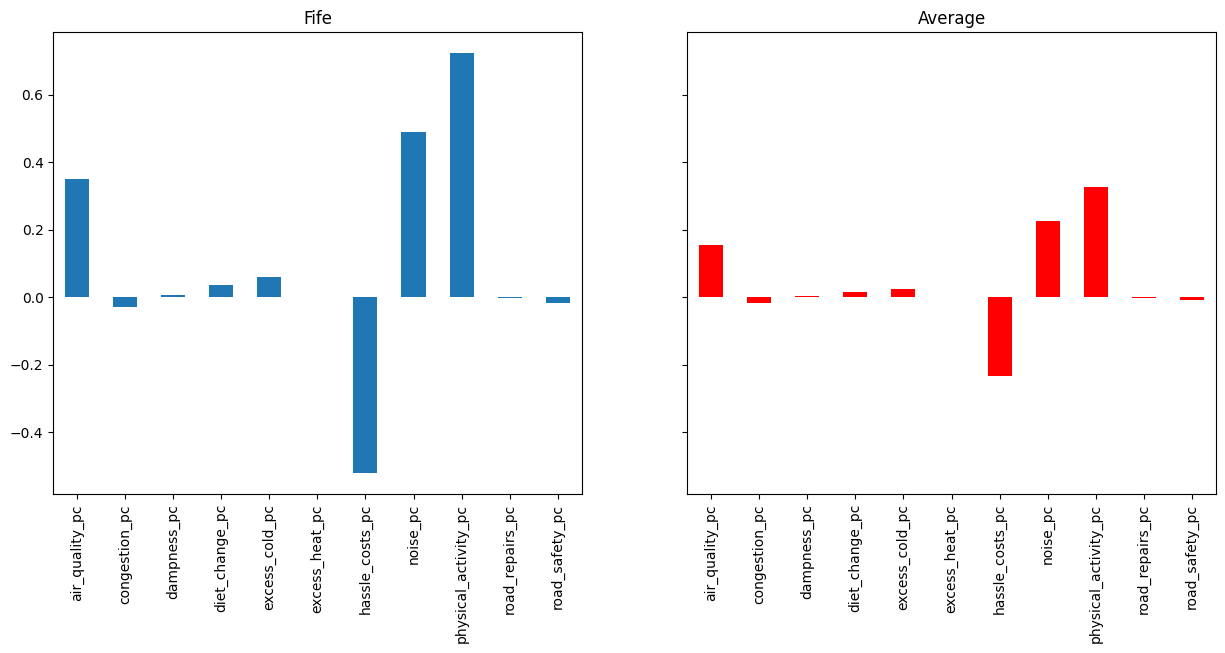

In [10]:
#Per capita cobenefits for Fife compared to Local Authority average (shared y axis)
#These should be combined onto one plot

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True  )

LA.loc['Fife', 'air_quality_pc':'road_safety_pc'].plot(ax=axes[0], kind='bar', title='Fife')
(LA.loc[:,'air_quality_pc':'road_safety_pc'].sum()/32).plot(ax=axes[1], kind='bar', title='Average', color='red')

<Axes: xlabel='SIMD2020v2_Rank', ylabel='sum_pc'>

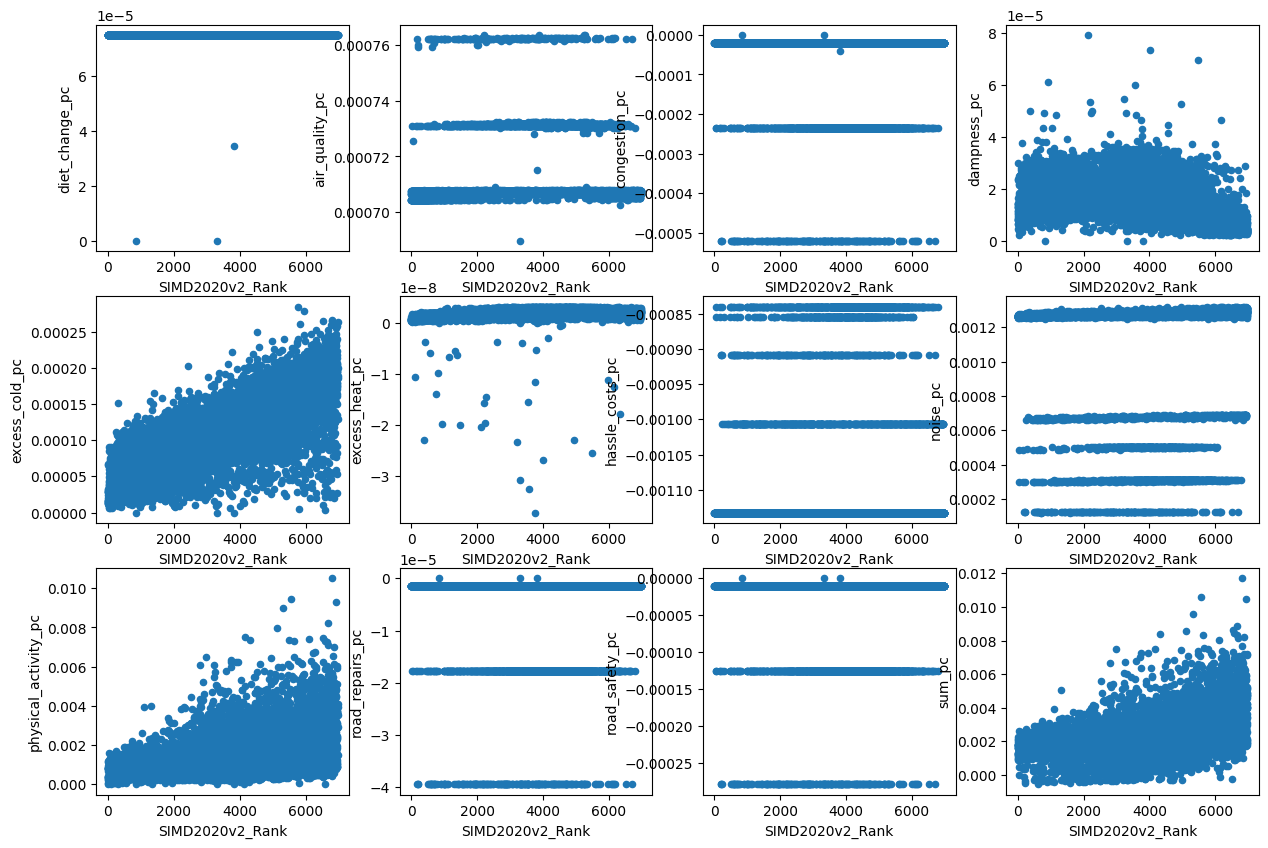

In [8]:
# Array of scatterplots to establish relationship between SIMD rank and individual cobenefits

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10)  )

Scot_SIMD_shape.plot(ax=axes[0,0], x='SIMD2020v2_Rank',y='diet_change_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[0,1], x='SIMD2020v2_Rank',y='air_quality_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[0,2], x='SIMD2020v2_Rank',y='congestion_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[0,3], x='SIMD2020v2_Rank',y='dampness_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[1,0], x='SIMD2020v2_Rank',y='excess_cold_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[1,1], x='SIMD2020v2_Rank',y='excess_heat_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[1,2], x='SIMD2020v2_Rank',y='hassle_costs_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[1,3], x='SIMD2020v2_Rank',y='noise_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[2,0], x='SIMD2020v2_Rank',y='physical_activity_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[2,1], x='SIMD2020v2_Rank',y='road_repairs_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[2,2], x='SIMD2020v2_Rank',y='road_safety_pc', kind='scatter')
Scot_SIMD_shape.plot(ax=axes[2,3], x='SIMD2020v2_Rank',y='sum_pc', kind='scatter')

<Axes: xlabel='SIMD2020v2_Rank', ylabel='sum_pc'>

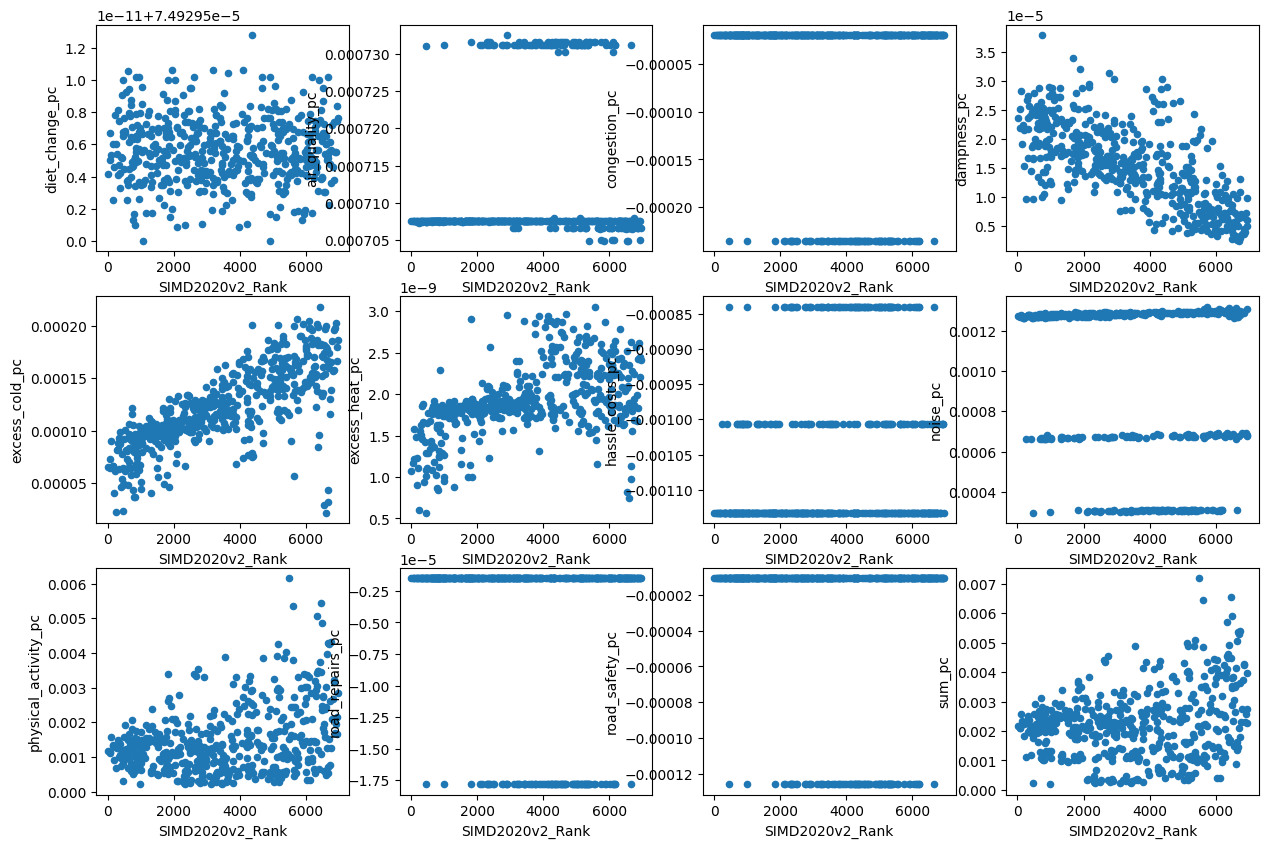

In [9]:
# Array of scatterplots to establish relationship between SIMD rank and individual cobenefits. Fife only.

# Some comments: Many cobenefits appear to be independent of socio-economic status.
#                Dampness cobenefit looks to be negatively correlated with socio-economic status.
#                Excess cold cobenefit looks to be positively correlated with socio-economic status.
#                In total, as socio-economic status increases, the cobenefit ceiling appears to increase, but the floor stays constant.

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10)  )

Fife = Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife']

Fife.plot(ax=axes[0,0], x='SIMD2020v2_Rank',y='diet_change_pc', kind='scatter')
Fife.plot(ax=axes[0,1], x='SIMD2020v2_Rank',y='air_quality_pc', kind='scatter')
Fife.plot(ax=axes[0,2], x='SIMD2020v2_Rank',y='congestion_pc', kind='scatter')
Fife.plot(ax=axes[0,3], x='SIMD2020v2_Rank',y='dampness_pc', kind='scatter')
Fife.plot(ax=axes[1,0], x='SIMD2020v2_Rank',y='excess_cold_pc', kind='scatter')
Fife.plot(ax=axes[1,1], x='SIMD2020v2_Rank',y='excess_heat_pc', kind='scatter')
Fife.plot(ax=axes[1,2], x='SIMD2020v2_Rank',y='hassle_costs_pc', kind='scatter')
Fife.plot(ax=axes[1,3], x='SIMD2020v2_Rank',y='noise_pc', kind='scatter')
Fife.plot(ax=axes[2,0], x='SIMD2020v2_Rank',y='physical_activity_pc', kind='scatter')
Fife.plot(ax=axes[2,1], x='SIMD2020v2_Rank',y='road_repairs_pc', kind='scatter')
Fife.plot(ax=axes[2,2], x='SIMD2020v2_Rank',y='road_safety_pc', kind='scatter')
Fife.plot(ax=axes[2,3], x='SIMD2020v2_Rank',y='sum_pc', kind='scatter')

<Axes: >

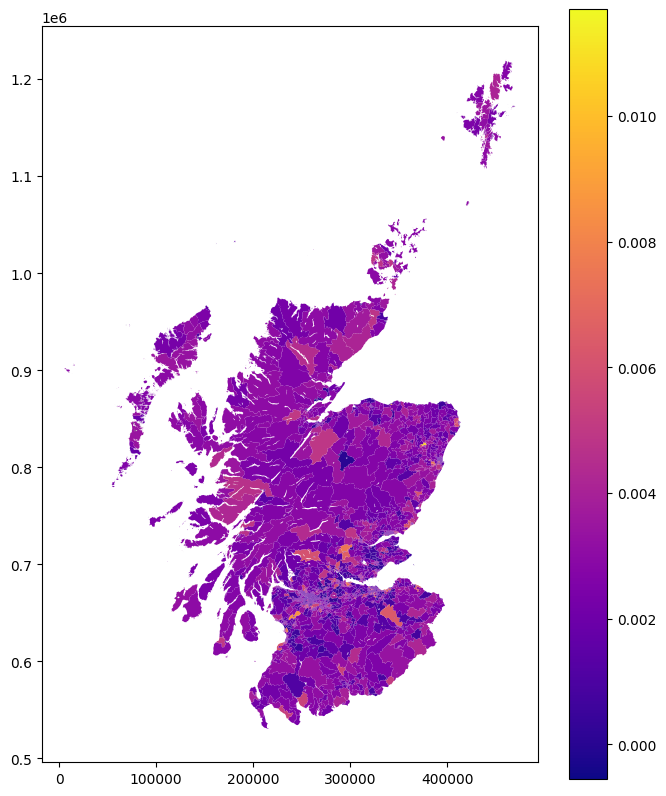

In [10]:
# Heatmap of combined cobenefit per capita across Scotland
fig, ax = plt.subplots(figsize=(8, 10))
Scot_SIMD_shape.plot(column='sum_pc', ax=ax, legend=True, cmap='plasma')

<Axes: >

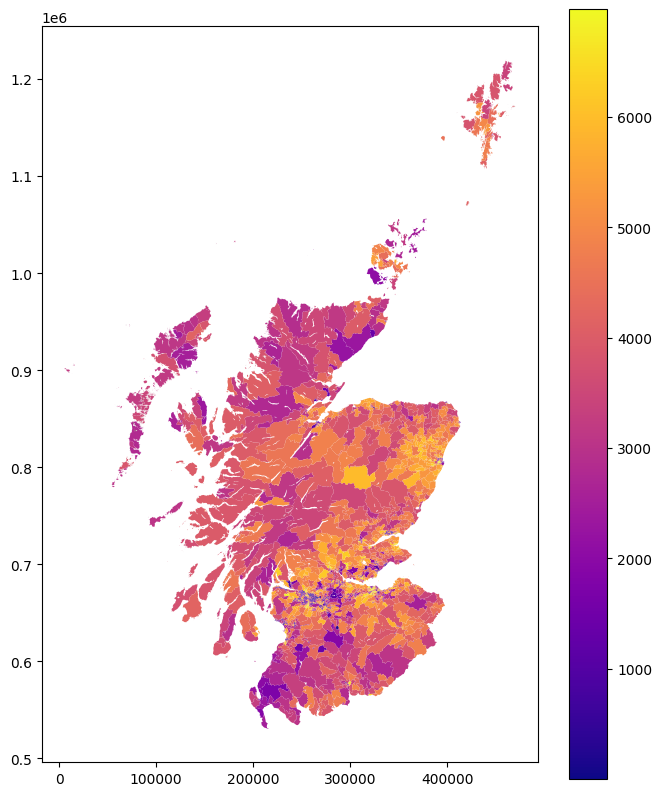

In [11]:
# Heatmap of SIMD rank across Scotland
fig, ax = plt.subplots(figsize=(8, 10))
Scot_SIMD_shape.plot(column='SIMD2020v2_Rank', ax=ax, legend=True, cmap='plasma')

<Axes: >

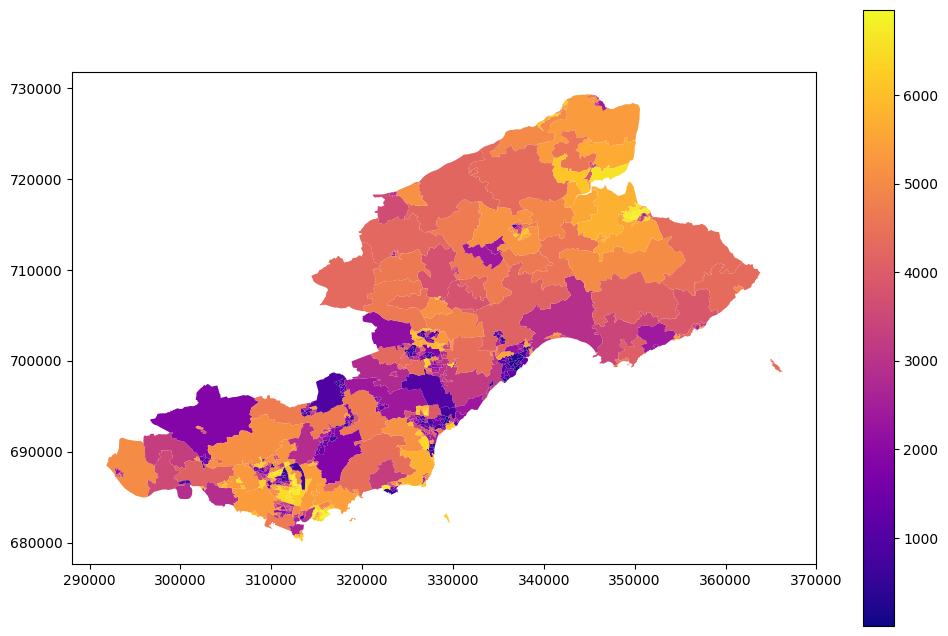

In [12]:
# Heat map of SIMD rank across Fife

fig, ax = plt.subplots(figsize=(12, 8))
Fife.plot(column='SIMD2020v2_Rank', ax=ax, legend=True, cmap='plasma')

<Axes: >

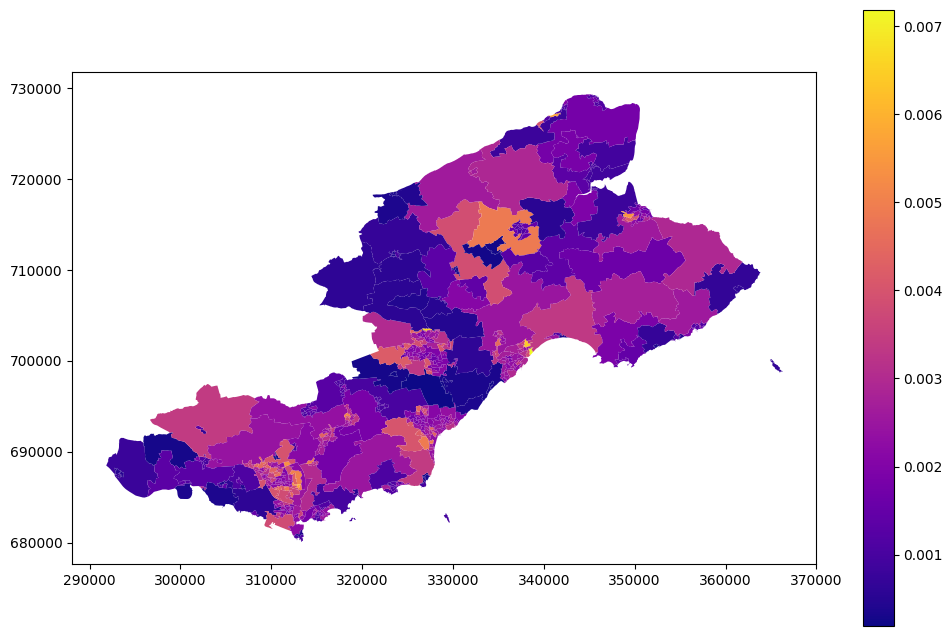

In [13]:
# Heat map of cobenefits across Fife

fig, ax = plt.subplots(figsize=(12, 8))
Fife.plot(column='sum_pc', ax=ax, legend=True, cmap='plasma')

In [18]:
# Here is our measure of cobenefit, 'normalised' to try to factor out the effect of SIMD rank.
# log transformation applied to make the numbers more parsable. This may cause warnings but still ok.
# We can definitely play around with this to find a measure that a) makes sense and b) gives a readable map.
Scot_SIMD_shape['sum_pc_normed'] = np.log(Scot_SIMD_shape.sum_pc / Scot_SIMD_shape.SIMD2020v2_Rank)


C:\Users\aevet\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
# Fixing the range for plotting
custommin = Scot_SIMD_shape.sum_pc_normed.min()
custommax = Scot_SIMD_shape.sum_pc_normed.max()

<Axes: >

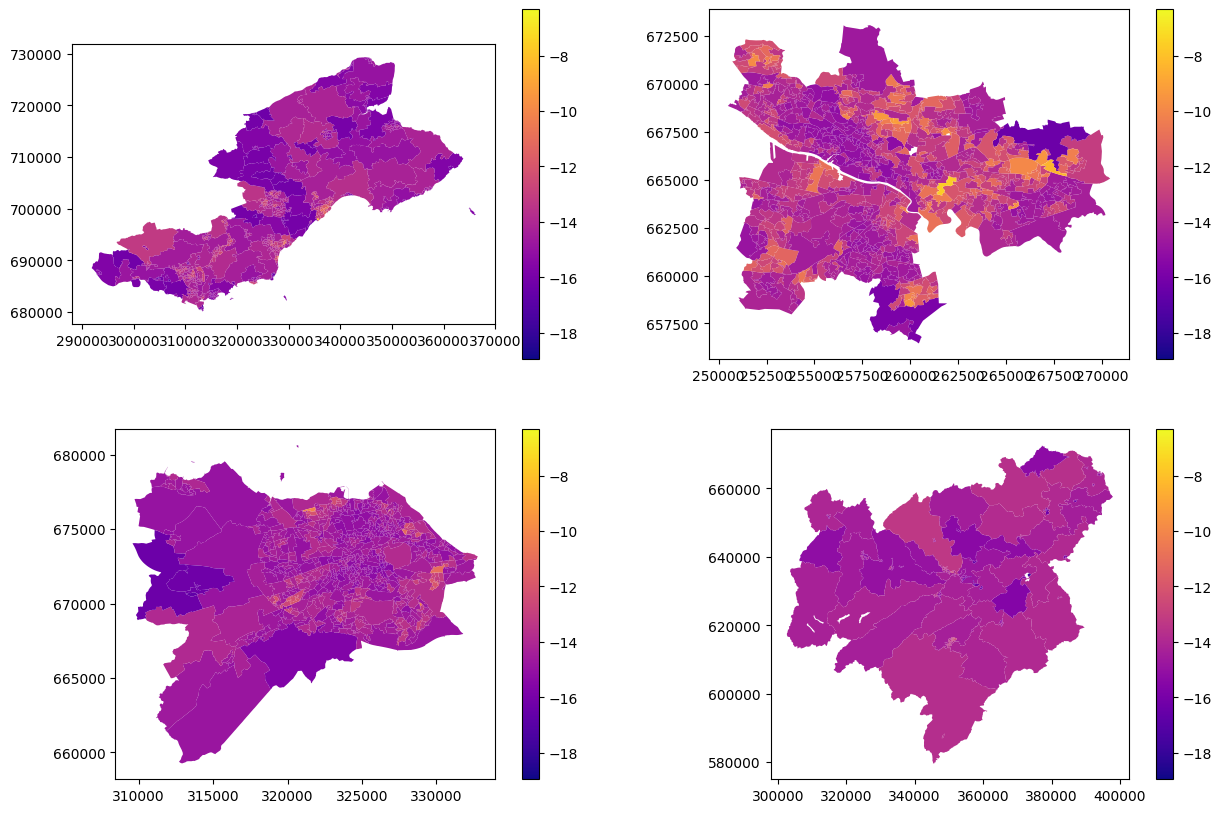

In [20]:
# Comparing Fife and the Borders (where we live), Edinburgh (which we know well) and Glasgow (as a comparable urban area).
# Heat map shows that even accounting for socio-economic factors, Glasgow recieves significantly more cobenefit value than other areas.

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc_normed', ax=axes[0,0], cmap='plasma', vmin=custommin, vmax=custommax, legend=True)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='sum_pc_normed', ax=axes[0,1], cmap='plasma', vmin=custommin, vmax=custommax, legend=True)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='City of Edinburgh'].plot(column='sum_pc_normed', ax=axes[1,0], cmap='plasma', vmin=custommin, vmax=custommax, legend=True)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Scottish Borders'].plot(column='sum_pc_normed', ax=axes[1,1], cmap='plasma', vmin=custommin, vmax=custommax, legend=True)

<Axes: >

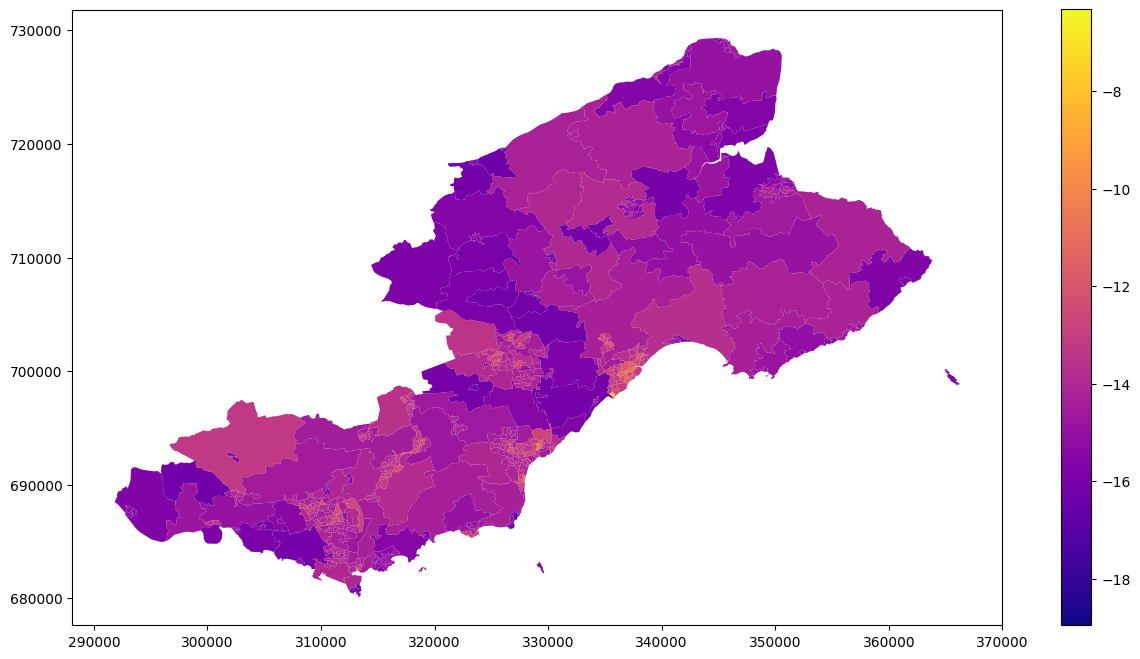

In [21]:
# Zoom in on Fife, showing hotspots on the South coast (Buckhaven and Kirkcaldy).

fig, ax = plt.subplots(figsize=(15,8))
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc_normed', ax=ax, cmap='plasma', vmin=custommin, vmax=custommax, legend=True)

In [22]:
#Scot_SIMD_shape.to_file('Scot_SIMD_shape_JSON', driver='GeoJSON')

In [23]:
import matplotlib.colors as mcolors

# Arguments: name of the cmap, list of colors, N (number of quantization levels, optional)
luigi_green = mcolors.LinearSegmentedColormap.from_list('LuigiGreen', ['#DADDD9', '#475841'], 5)
luigi_grey = mcolors.LinearSegmentedColormap.from_list('LuigiGrey', ['#D8D8D8','#3F403F'], 5)

spec1 = mcolors.LinearSegmentedColormap.from_list('spec1', ['#E6E8E6','#CED0CE','#9FB8AD','#475841','#3F403F'], 5)
spec4 = mcolors.LinearSegmentedColormap.from_list('spec4', ['#001B2E','#294C60','#ADB6C4','#FFEFD3','#FFC49B'], 5)




<Axes: >

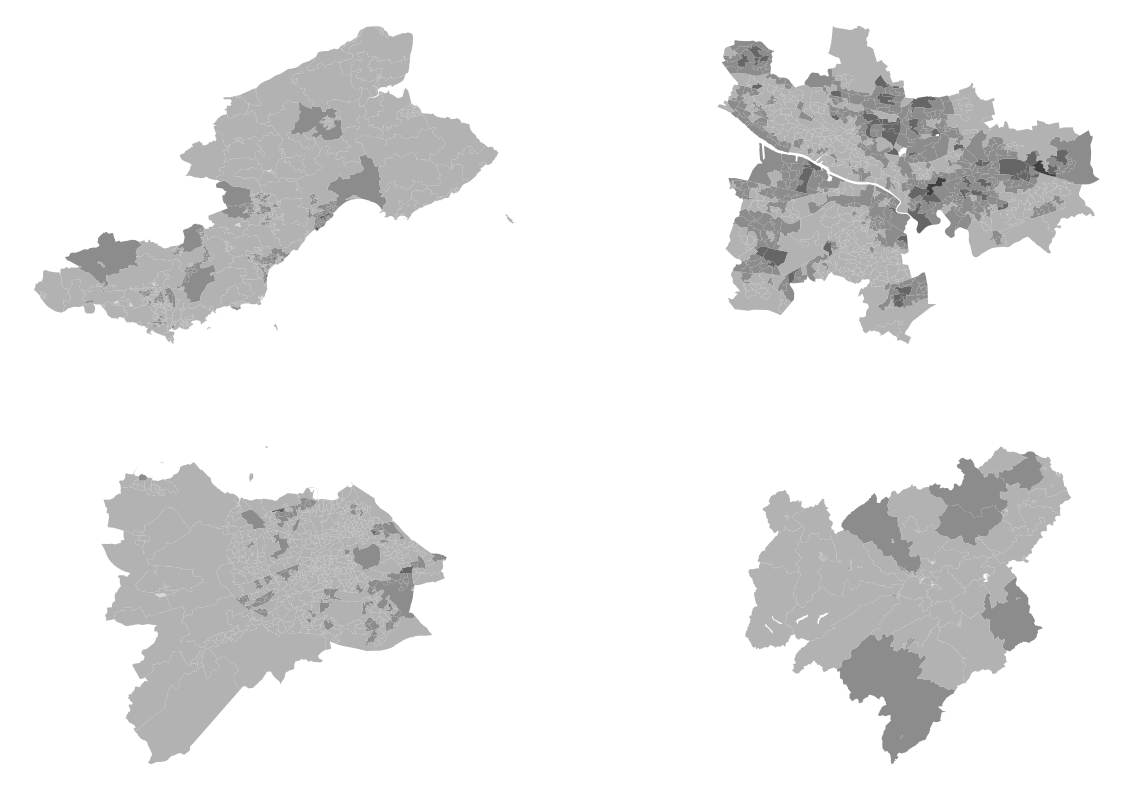

In [24]:
# Comparing Fife and the Borders (where we live), Edinburgh (which we know well) and Glasgow (as a comparable urban area).
# Heat map shows that even accounting for socio-economic factors, Glasgow recieves significantly more cobenefit value than other areas.

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
customcmap = luigi_grey

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc_normed', ax=axes[0,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='sum_pc_normed', ax=axes[0,1], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='City of Edinburgh'].plot(column='sum_pc_normed', ax=axes[1,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Scottish Borders'].plot(column='sum_pc_normed', ax=axes[1,1], cmap=customcmap, vmin=custommin, vmax=custommax)

<Axes: >

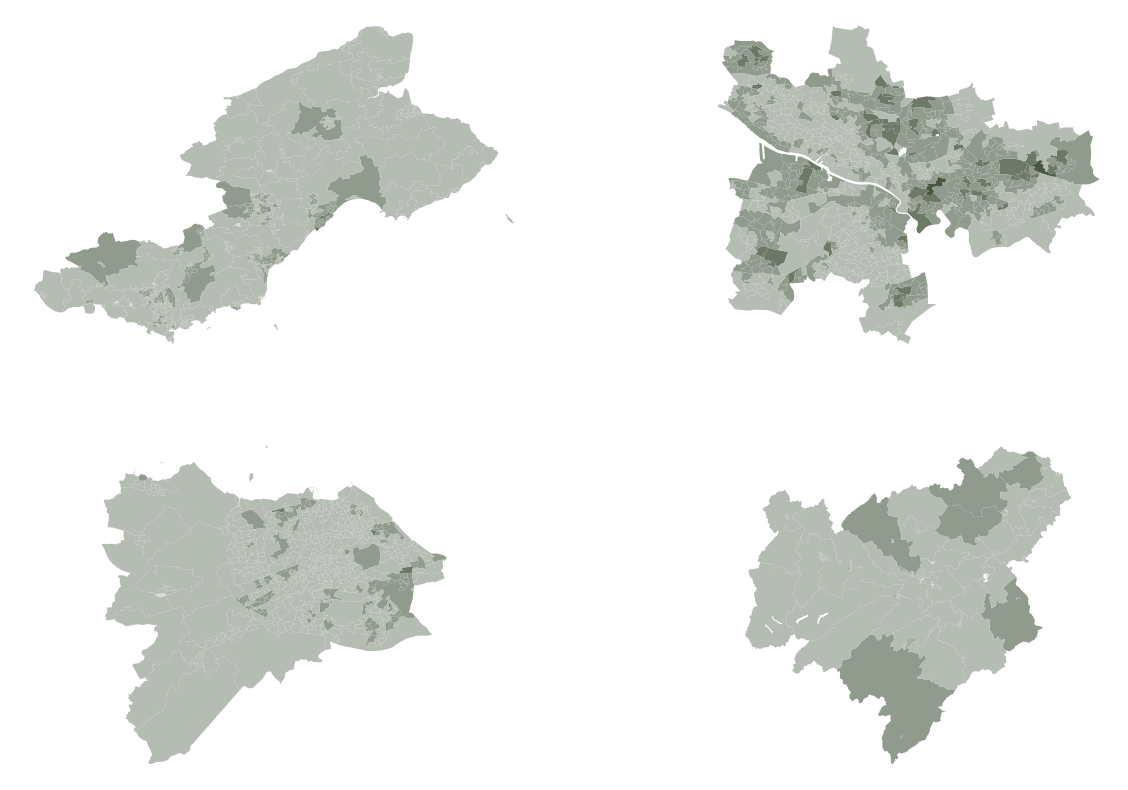

In [25]:
# Comparing Fife and the Borders (where we live), Edinburgh (which we know well) and Glasgow (as a comparable urban area).
# Heat map shows that even accounting for socio-economic factors, Glasgow recieves significantly more cobenefit value than other areas.

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
customcmap = luigi_green

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc_normed', ax=axes[0,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='sum_pc_normed', ax=axes[0,1], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='City of Edinburgh'].plot(column='sum_pc_normed', ax=axes[1,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Scottish Borders'].plot(column='sum_pc_normed', ax=axes[1,1], cmap=customcmap, vmin=custommin, vmax=custommax)

<Axes: >

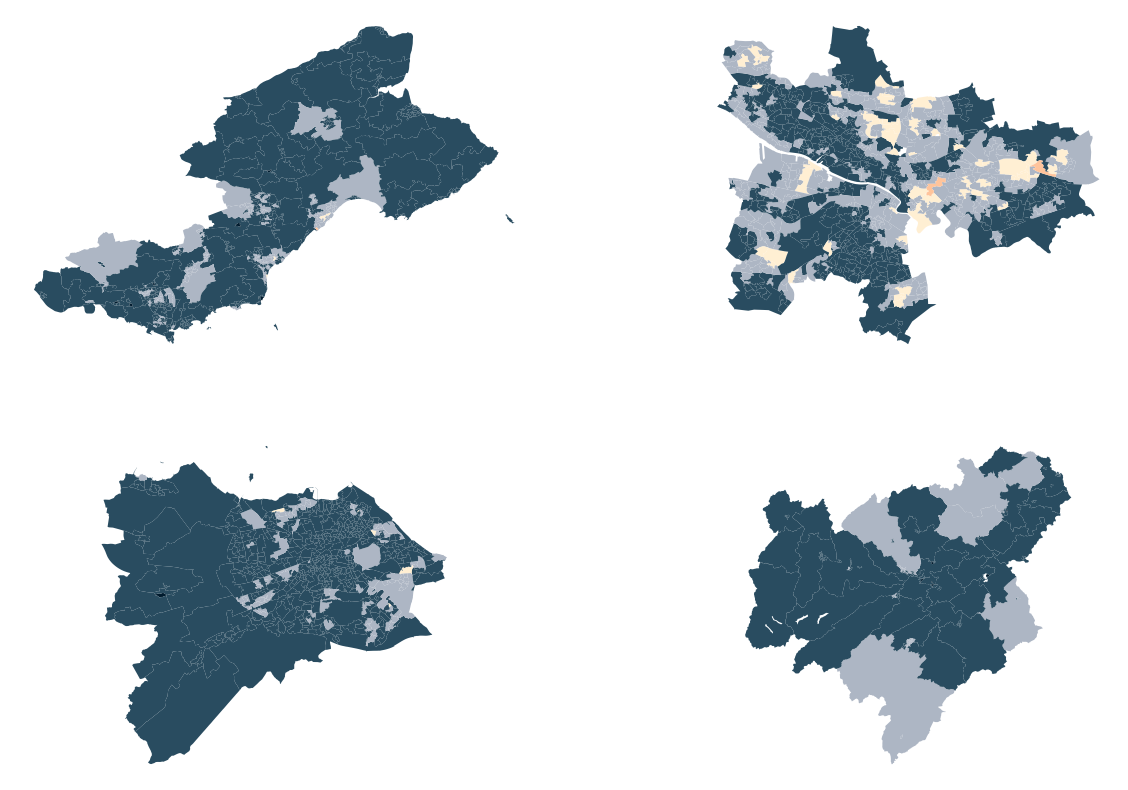

In [26]:
# Comparing Fife and the Borders (where we live), Edinburgh (which we know well) and Glasgow (as a comparable urban area).
# Heat map shows that even accounting for socio-economic factors, Glasgow recieves significantly more cobenefit value than other areas.

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
customcmap = spec4

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc_normed', ax=axes[0,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='sum_pc_normed', ax=axes[0,1], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='City of Edinburgh'].plot(column='sum_pc_normed', ax=axes[1,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Scottish Borders'].plot(column='sum_pc_normed', ax=axes[1,1], cmap=customcmap, vmin=custommin, vmax=custommax)

In [27]:
# Converting to WGS84 coordinates for Flourish
#Scot_SIMD_shape = Scot_SIMD_shape.to_crs(epsg=4326)

In [28]:
# Exporting to GeoJSON file for Flourish (takes a bit of time)
#Scot_SIMD_shape.loc[:,['small_area','sum_pc', 'sum_pc_normed','geometry']].to_file('flourish.geojson', driver='GeoJSON')

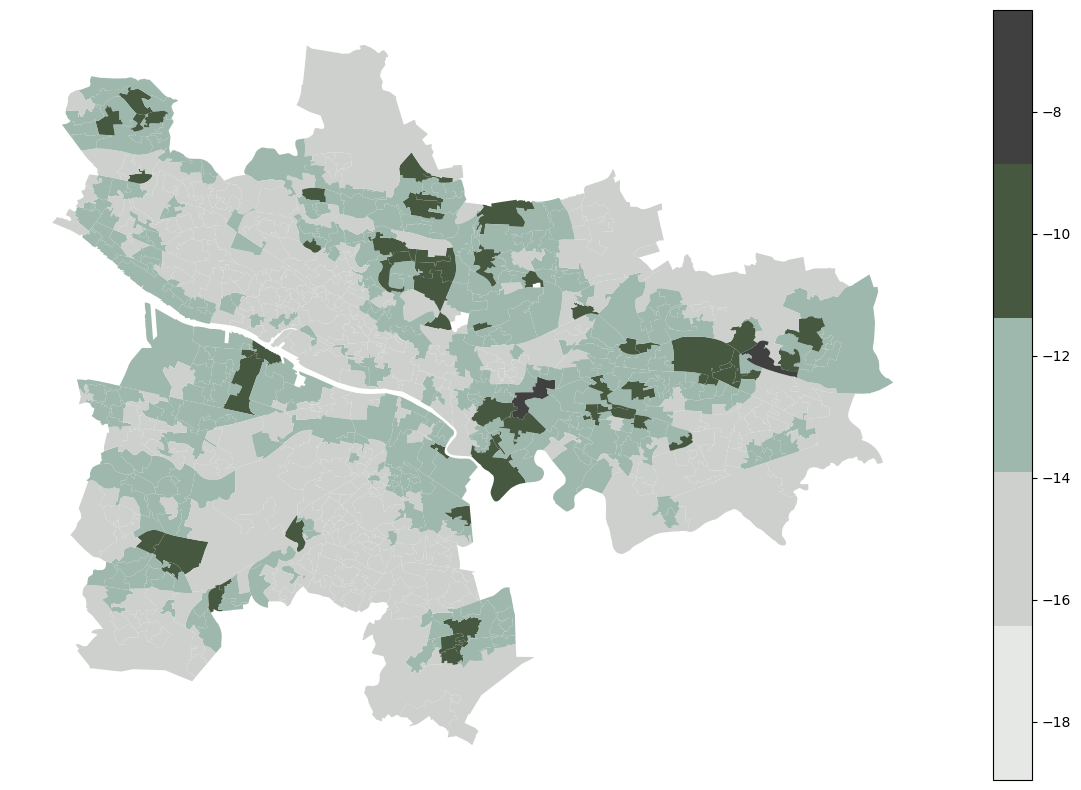

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))

customcmap = spec1

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(
    column='sum_pc_normed', ax=ax, cmap=customcmap, vmin=custommin, vmax=custommax, legend=True)
ax.set_axis_off()

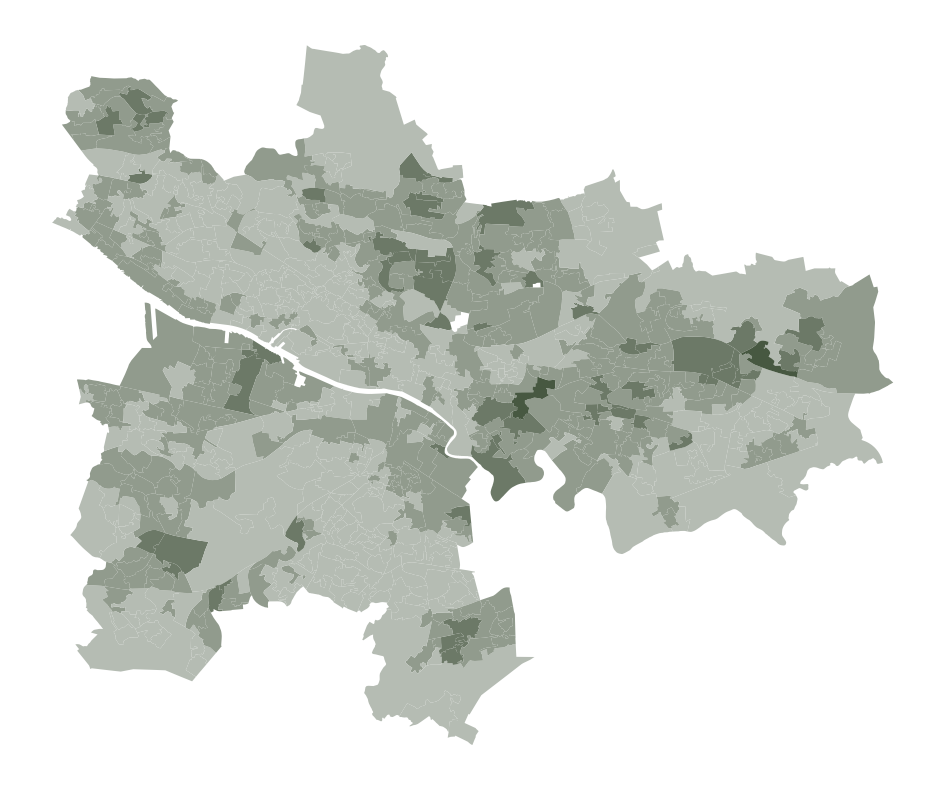

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))

customcmap = luigi_green
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='sum_pc_normed', ax=ax, cmap=customcmap, vmin=custommin, vmax=custommax)
ax.set_axis_off()

<Axes: >

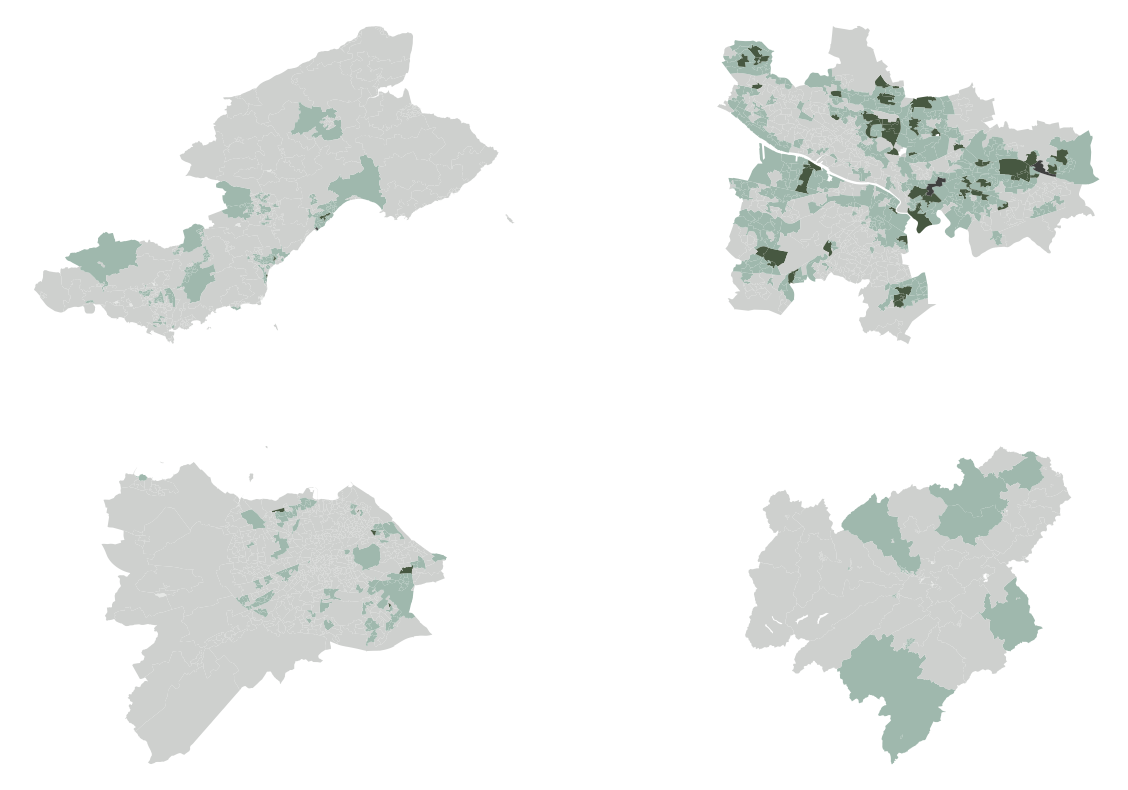

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
customcmap = spec1

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc_normed', ax=axes[0,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='sum_pc_normed', ax=axes[0,1], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='City of Edinburgh'].plot(column='sum_pc_normed', ax=axes[1,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Scottish Borders'].plot(column='sum_pc_normed', ax=axes[1,1], cmap=customcmap, vmin=custommin, vmax=custommax)

<Axes: >

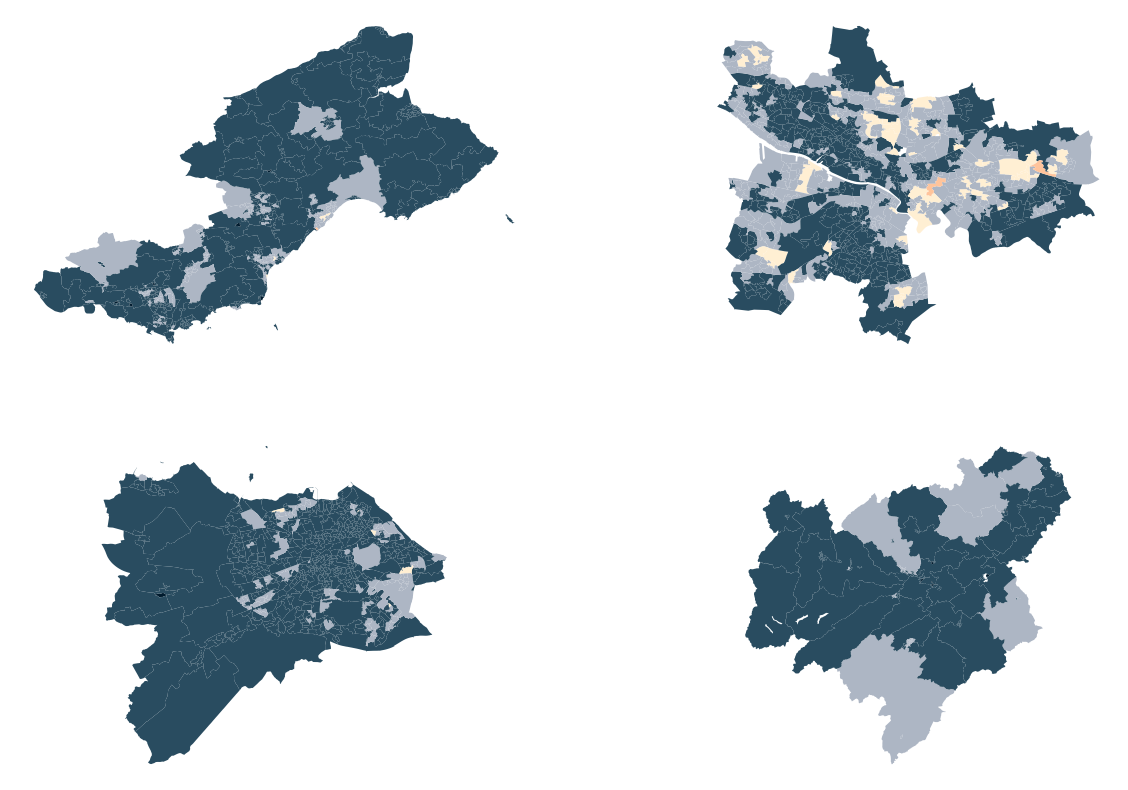

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
customcmap = spec4

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc_normed', ax=axes[0,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='sum_pc_normed', ax=axes[0,1], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='City of Edinburgh'].plot(column='sum_pc_normed', ax=axes[1,0], cmap=customcmap, vmin=custommin, vmax=custommax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Scottish Borders'].plot(column='sum_pc_normed', ax=axes[1,1], cmap=customcmap, vmin=custommin, vmax=custommax)

In [33]:
SIMDmin = Scot_SIMD_shape.SIMD2020v2_Rank.min()
SIMDmax = Scot_SIMD_shape.SIMD2020v2_Rank.max()

<Axes: >

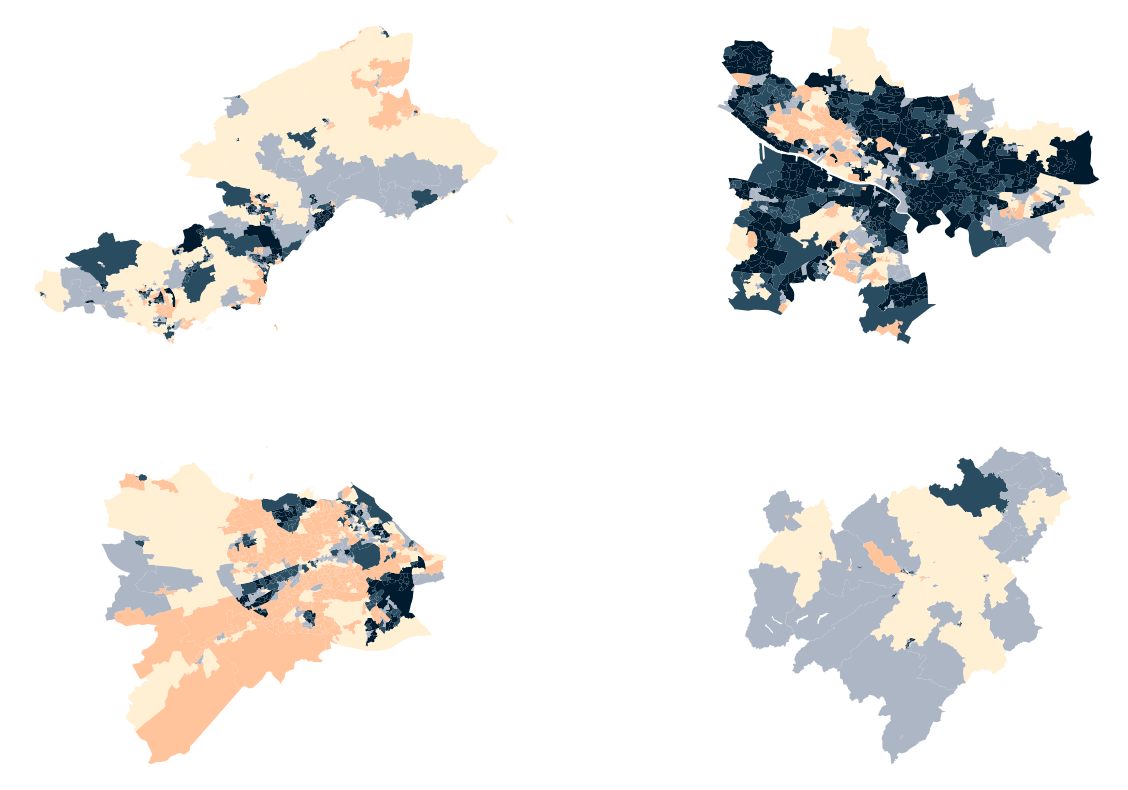

In [34]:


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
customcmap = spec4

Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='SIMD2020v2_Rank', ax=axes[0,0], cmap=customcmap, vmin=SIMDmin, vmax=SIMDmax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Glasgow City'].plot(column='SIMD2020v2_Rank', ax=axes[0,1], cmap=customcmap, vmin=SIMDmin, vmax=SIMDmax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='City of Edinburgh'].plot(column='SIMD2020v2_Rank', ax=axes[1,0], cmap=customcmap, vmin=SIMDmin, vmax=SIMDmax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Scottish Borders'].plot(column='SIMD2020v2_Rank', ax=axes[1,1], cmap=customcmap, vmin=SIMDmin, vmax=SIMDmax)

In [35]:
spec1smooth = mcolors.LinearSegmentedColormap.from_list('spec1', ['#E6E8E6','#CED0CE','#9FB8AD','#475841','#3F403F'] )
spec4smooth = mcolors.LinearSegmentedColormap.from_list('spec1', ['#001B2E','#294C60','#ADB6C4','#FFEFD3','#FFC49B'] )

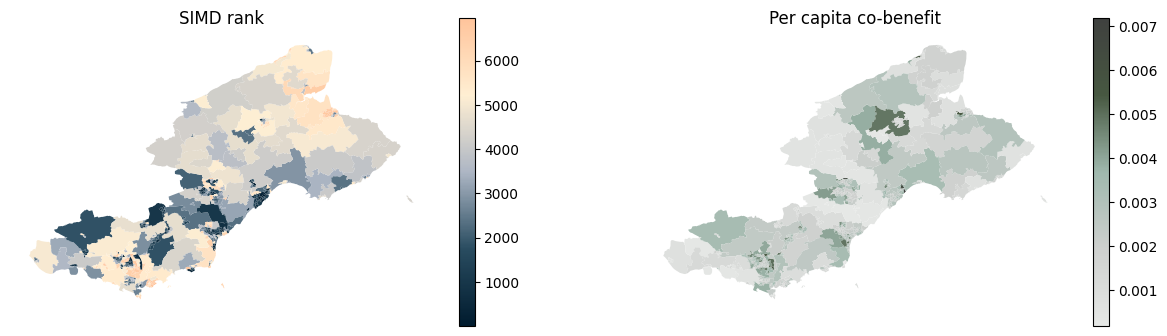

In [117]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
axes[0].set_axis_off()
axes[0].title.set_text('SIMD rank')
axes[1].set_axis_off()
axes[1].title.set_text('Per capita co-benefit')
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='SIMD2020v2_Rank', ax=axes[0], legend=True, cmap=spec4smooth)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc', ax=axes[1], legend=True, cmap=spec1smooth)
plt.savefig('../../aevetts.github.io/images/DLDVC/Fife')

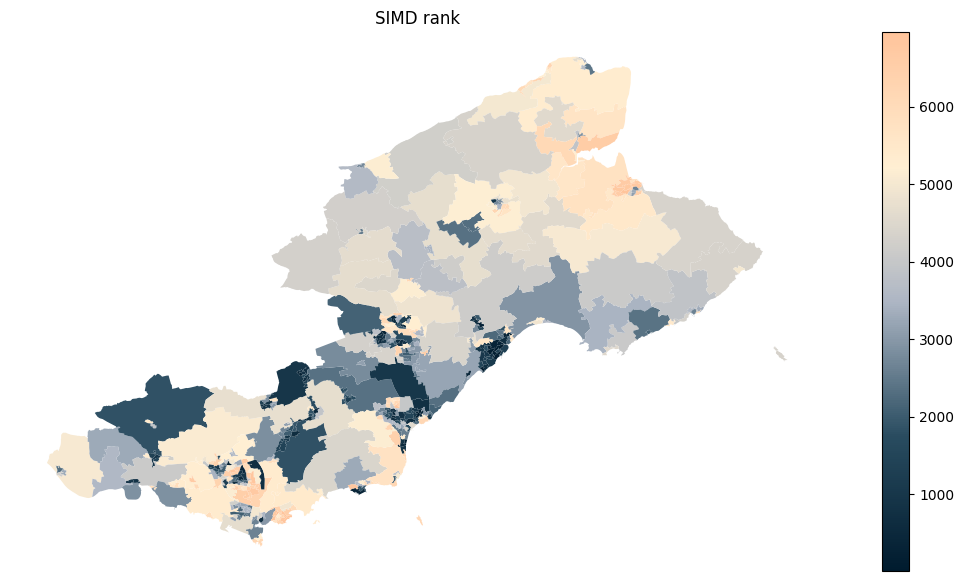

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_axis_off()
ax.title.set_text('SIMD rank')
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='SIMD2020v2_Rank', ax=ax, legend=True, cmap=spec4smooth)
plt.savefig('../../aevetts.github.io/images/DLDVC/FifeSIMD')

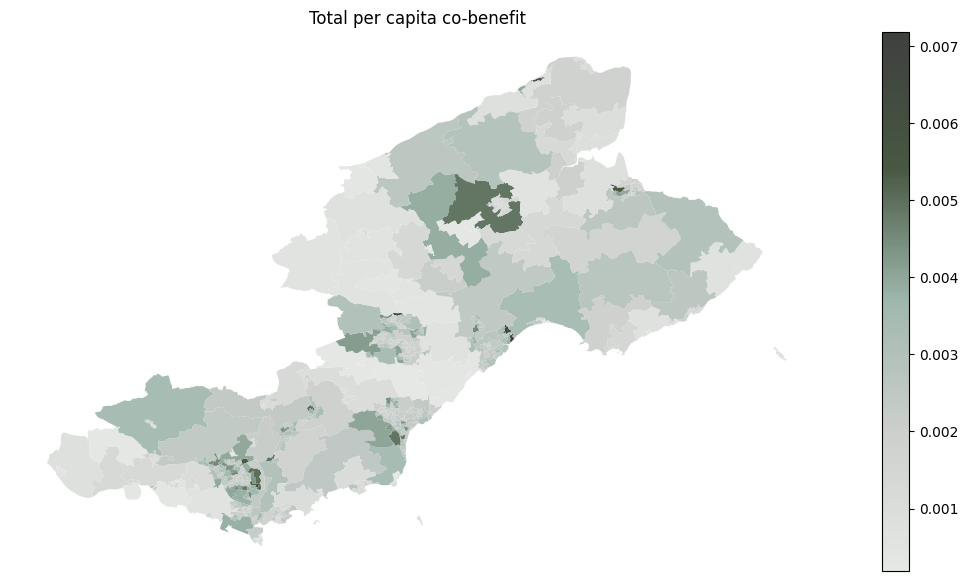

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_axis_off()
ax.title.set_text('Total per capita co-benefit')
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority=='Fife'].plot(column='sum_pc', ax=ax, legend=True, cmap=spec1smooth)
plt.savefig('../../aevetts.github.io/images/DLDVC/FifeCoben')

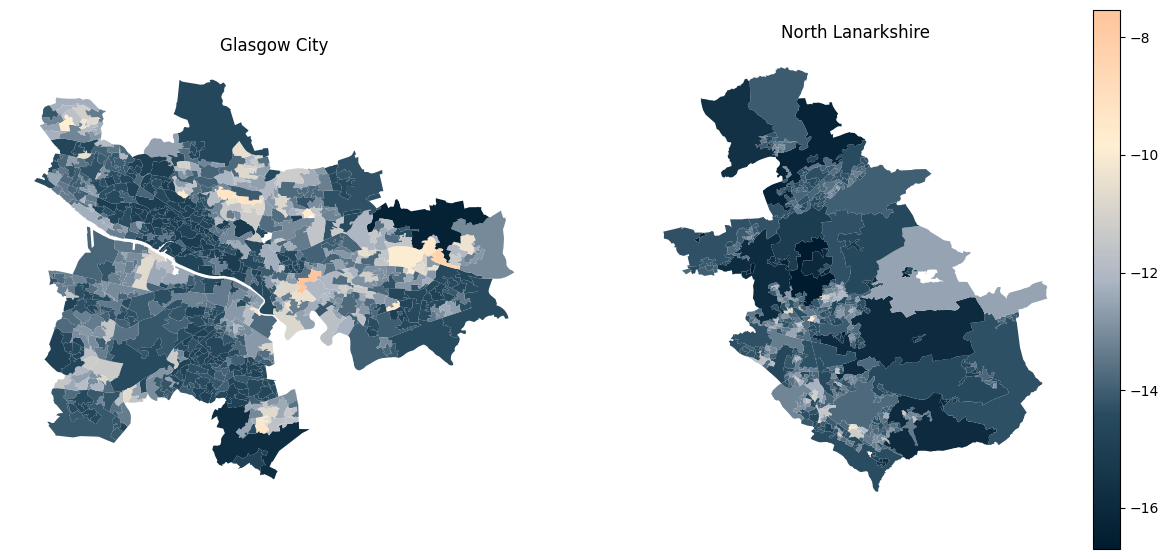

In [120]:
local = ['Glasgow City', 'North Lanarkshire']

localvmin = Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority.isin(local)].sum_pc_normed.min()
localvmax = Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority.isin(local)].sum_pc_normed.max()
    
fig, axes = plt.subplots(ncols=2, figsize=(15,7))
axes[0].set_axis_off()
axes[0].title.set_text(local[0])
axes[1].set_axis_off()
axes[1].title.set_text(local[1])
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority==local[0]].plot(column='sum_pc_normed', ax=axes[0], legend=False, cmap=spec4smooth,
                                                                          vmin=localvmin, vmax=localvmax)
Scot_SIMD_shape.loc[Scot_SIMD_shape.local_authority==local[1]].plot(column='sum_pc_normed', ax=axes[1], legend=True, cmap=spec4smooth,
                                                                          vmin=localvmin, vmax=localvmax)
plt.savefig('../../aevetts.github.io/images/DLDVC/GlasgowLanark')